In [6]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

x, y = load_boston(return_X_y=True)
print(x.shape)
print(y.shape)

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    test_size=0.15,
                                                    random_state=42)

(506, 13)
(506,)


In [19]:
"""
常用评估指标
rmse：回归后均方误差
mae
logloss：二分类问题
mlogloss：多分裂用，对数损失
error：分类用，分类误差等于1-准确率
auc:分类指标，auc面积
"""
d_x = xgb.DMatrix(data=x, label=y)

params = {'subsample': 1,
          'objective': 'reg:linear',
          'silent': True,
          'eta': 0.2,
          'alpha': 0.2,
          'lambda': 0.2,
          'gamma': 20,
          'eval_metric': 'rmse',
          'max_depth': 5}

num_round = 180
n_fold = 5
cv_result_1 = xgb.cv(params=params,
                     dtrain=d_x,
                     num_boost_round=num_round,
                     nfold=n_fold)

# 每一轮过后都会做交叉验证，并且返回一个dataframe
print(cv_result_1)


     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          19.221054        0.135062       19.343336       0.588833
1          15.497061        0.107690       15.688567       0.528637
2          12.517883        0.087561       12.880251       0.490842
3          10.137455        0.069629       10.596303       0.446211
4           8.229063        0.054393        8.886687       0.465522
..               ...             ...             ...            ...
175         1.419799        0.025463        3.745635       0.961326
176         1.419799        0.025463        3.745635       0.961326
177         1.419799        0.025463        3.745635       0.961326
178         1.419799        0.025463        3.745635       0.961326
179         1.419799        0.025463        3.745635       0.961326

[180 rows x 4 columns]


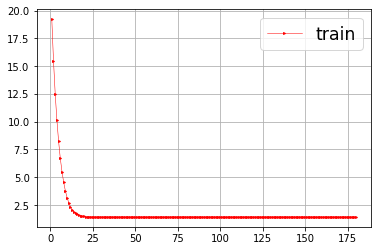

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.grid()
plt.plot(range(1, 181), cv_result_1.iloc[:, 0],
         color='red',
         marker='>',
         linestyle='-',
         linewidth=0.5,
         markersize=2,
         label='train')
plt.legend(fontsize='xx-large')
plt.show()

